# Using Machine Learning to explain and predict the life expectancy of different countries
The project tries to create a model based on data provided by the World Health Organization (WHO) to evaluate the life expectancy for different countries in years. 
The data offers a timeframe from 2000 to 2015. The data originates from here: https://www.kaggle.com/kumarajarshi/life-expectancy-who/data The output algorithms have been used to test if they can maintain their accuracy in predicting the life expectancy for data they haven’t been trained. 
Four algorithms have been used:

Linear Regression
Ridge Regression
Lasso Regression
ElasticNet Regression
Linear Regression with Polynomic features
Decision Tree Regression
Random Forest Regression

# loading libraries

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns
%matplotlib inline


In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_cdedc85a2bbc4a22a6fc25706d110a86 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ibm_api_key_id',
    ibm_auth_endpoint="ibm_auth_endpoint",
    config=Config(signature_version='oauth'),
    endpoint_url='endpoint_url')

body = client_cdedc85a2bbc4a22a6fc25706d110a86.get_object(Bucket='predictinglifeexpectancyusingmach-donotdelete-pr-ttfyr893fivolt',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='project_id', project_access_token='project_access_token')
pc = project.project_context

# Loading dataset

In [4]:
life_data = pd.read_csv(body)
life_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
life_data = life_data.drop(['Status'], axis=1)
life_data = life_data.drop(['Year'], axis=1)
life_data.head()

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
life_data = life_data.groupby('Country').mean().fillna(0)
life_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,0.000000e+00,3.42500,3.37500,0.488625,8.84375


# EDA

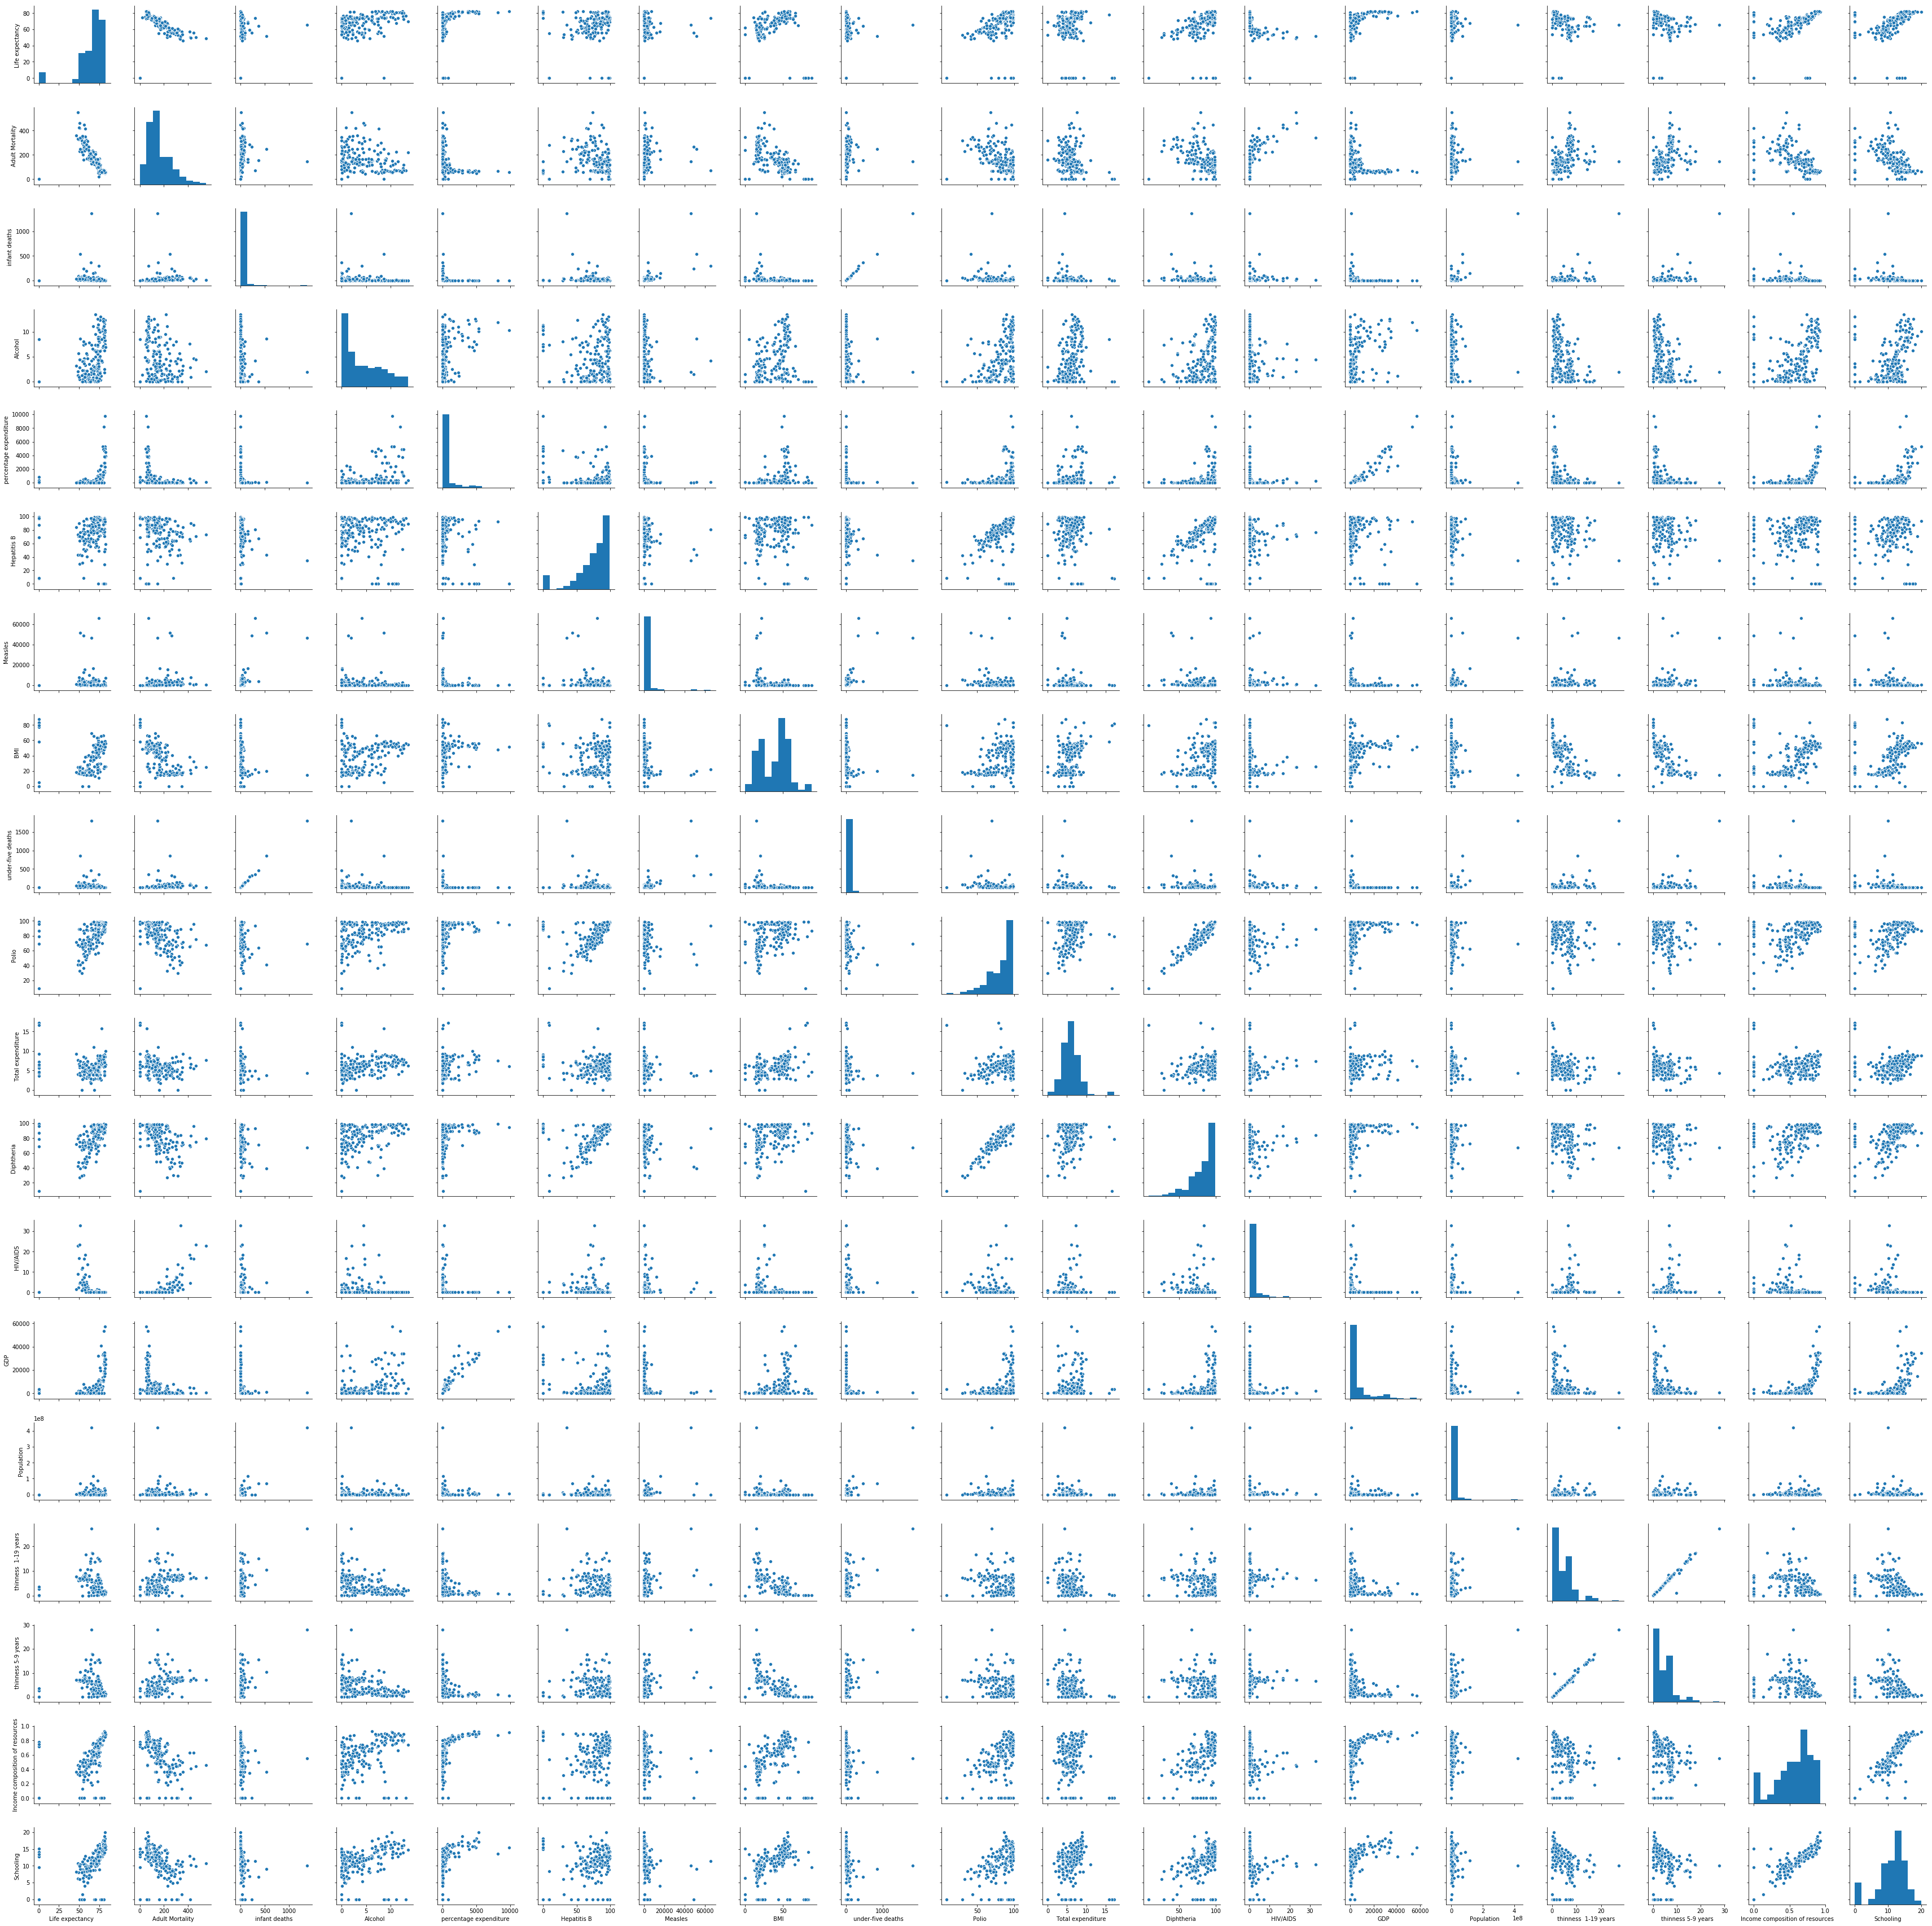

In [7]:
sns.pairplot(life_data)

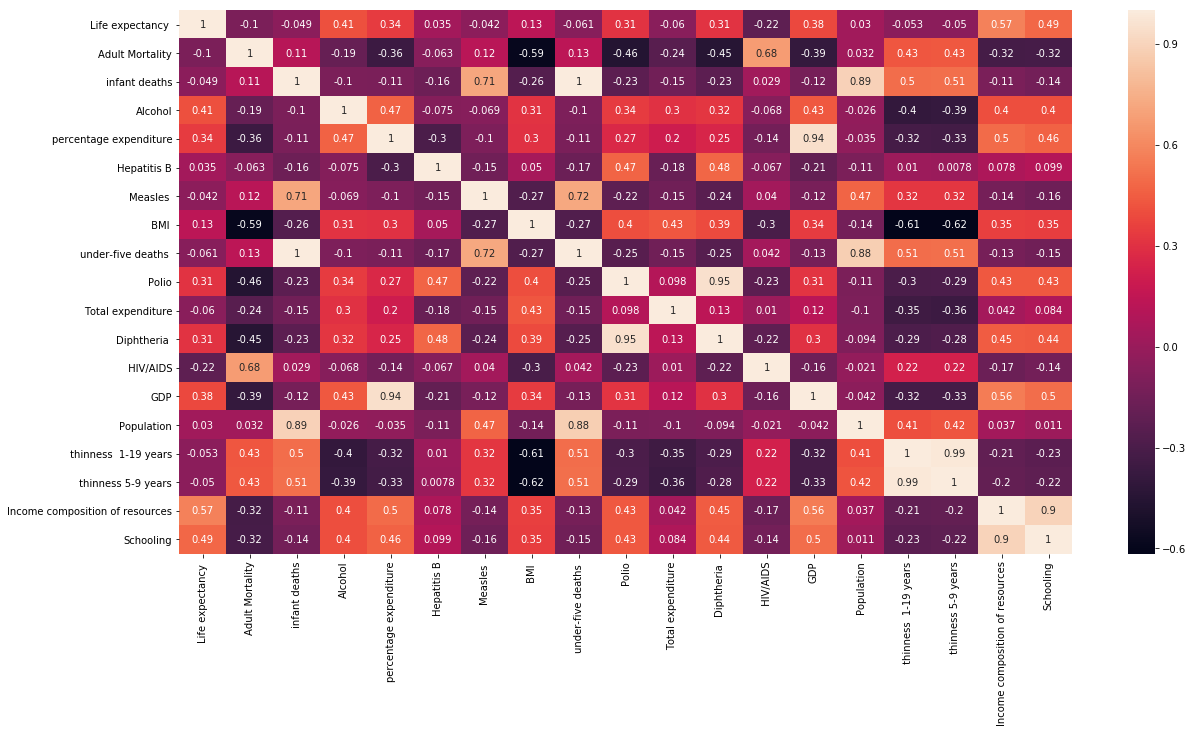

In [8]:
plt.figure(figsize = (20, 10))
sns.heatmap(life_data.corr(), annot = True)

# Preprocessing

In [9]:
life_labels = life_data['Life expectancy ']
life_features = life_data.drop('Life expectancy ', axis = 1)
life_features.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,
Afghanistan,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,0.000000e+00,3.42500,3.37500,0.488625,8.84375


In [10]:
life_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,0.000000e+00,3.42500,3.37500,0.488625,8.84375


In [11]:
life_features.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,
Afghanistan,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,0.000000e+00,3.42500,3.37500,0.488625,8.84375


In [12]:
life_features.fillna(value = life_features.mean(), inplace = True)

In [13]:
life_labels.fillna(value = life_labels.mean(), inplace = True)

In [14]:
stats.describe(life_features[1:])

DescribeResult(nobs=192, minmax=(array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 9. , 0. , 9. , 0.1, 0. ,
       0. , 0. , 0. , 0. , 0. ]), array([5.50062500e+02, 1.36668750e+03, 1.34973333e+01, 9.80181038e+03,
       9.90000000e+01, 6.58579375e+04, 8.73000000e+01, 1.81250000e+03,
       9.90000000e+01, 1.72400000e+01, 9.90000000e+01, 3.29437500e+01,
       5.73628746e+04, 4.21467691e+08, 2.71000000e+01, 2.79437500e+01,
       9.31437500e-01, 2.00375000e+01])), mean=array([1.55670247e+02, 2.85745443e+01, 4.41671568e+00, 7.12321318e+02,
       7.49104236e+01, 2.30174674e+03, 3.88556641e+01, 3.96419271e+01,
       8.26078218e+01, 5.95388607e+00, 8.23842541e+01, 1.67047526e+00,
       6.13063890e+03, 9.44107380e+06, 4.52333984e+00, 4.55602214e+00,
       5.74880534e-01, 1.11079427e+01]), variance=array([1.00968822e+04, 1.28540496e+04, 1.50764623e+01, 2.10950227e+06,
       6.15793602e+02, 6.25178778e+07, 3.34239917e+02, 2.36800172e+04,
       2.74638648e+02, 5.21208797e+00, 2.92218598e+02,

In [15]:
min_max_scaler = MinMaxScaler()
life_features = min_max_scaler.fit_transform(life_features)

In [16]:
life_features

array([[4.89148960e-01, 5.72552248e-02, 1.06502519e-03, ...,
        5.57593380e-01, 4.45950480e-01, 4.09856519e-01],
       [8.19225088e-02, 5.03041112e-04, 3.59237627e-01, ...,
        6.08365019e-02, 7.62128431e-01, 6.05739239e-01],
       [1.96682195e-01, 1.48625783e-02, 3.01294083e-02, ...,
        2.13822411e-01, 7.46024290e-01, 6.34435434e-01],
       ...,
       [3.85069878e-01, 2.88105364e-02, 3.50686555e-03, ...,
        4.92059942e-01, 5.10501241e-01, 4.24516532e-01],
       [6.44131349e-01, 2.44660905e-02, 1.65909315e-01, ...,
        2.42004026e-01, 5.35127156e-01, 5.59575795e-01],
       [8.40586297e-01, 1.94356793e-02, 3.32065593e-01, ...,
        2.50055916e-01, 4.71448702e-01, 4.90330630e-01]])

In [17]:
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(
        life_features, life_labels, train_size = 0.7, test_size = 0.3)

# Random Forest

In [18]:
random_forest_model = RandomForestRegressor()
random_forest_fit = random_forest_model.fit(life_features_train, life_labels_train)
random_forest_score = cross_val_score(random_forest_fit, life_features_train, life_labels_train, cv = 5)
print("mean cross validation score: %.2f"% np.mean(random_forest_score))
print("score without cv: %.2f"% random_forest_fit.score(life_features_train, life_labels_train))
print("R^2 score on the test data %.2f"%r2_score(life_labels_test, random_forest_fit.predict(life_features_test)))

mean cross validation score: 0.75
score without cv: 0.98
R^2 score on the test data 0.98


In [19]:
random_forest_model_predict = random_forest_model.predict(life_features_test)
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(RandomForestRegressor(),param_grid={'min_samples_split': range(2, 10)},scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(r2_score), verbose=0)

In [20]:
grid_cv.best_params_

{'min_samples_split': 9}

In [21]:
result = grid_cv.cv_results_

In [22]:
print("Best Parameters: " + str(grid_cv.best_params_))

Best Parameters: {'min_samples_split': 9}


In [23]:
result = grid_cv.cv_results_

In [24]:
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"% r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"% mean_squared_error(life_labels_test, random_forest_model_predict))
print("Mean absolute error: %.2f"% mean_absolute_error(life_labels_test, random_forest_model_predict))

R^2 score on training data: 0.98
R^2 score: 0.98
Mean squared error: 7.76
Mean absolute error: 2.04


# Deploying on the IBM Cloud 

In [25]:
!pip install watson-machine-learning-client

In [26]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-26 19:04:56,044 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [27]:
wml_credentials={
  "apikey": "apikey",
  "instance_id": "instance_id",
  "url": "url"
}

In [28]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [29]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "name", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "email", 
               client.repository.ModelMetaNames.NAME: "life_data"}

In [30]:
model_artifact =client.repository.store_model(grid_cv, meta_props=model_props)

In [31]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [32]:
published_model_uid

'ed736966-79e8-4ebf-a99d-8c86360ddf95'

In [33]:
deployment = client.deployments.create(published_model_uid, name="life_data")



#######################################################################################

Synchronous deployment creation for uid: 'ed736966-79e8-4ebf-a99d-8c86360ddf95' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='b698d397-f30d-4713-884a-9ef939ca1926'
------------------------------------------------------------------------------------------------




In [34]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)